# 1. 感知机与神经网络历史

> 从生物神经元到人工智能 | 理解神经网络的起源与发展

---

## 📚 本章目标

**学习目标：**
- 🧠 理解生物神经元与人工神经元的联系
- 🔢 掌握感知机的数学模型
- ⚠️ 理解单层感知机的局限性（XOR问题）
- 📜 了解神经网络发展的历史脉络
- 💻 从零实现感知机算法

**实战项目：**
- 实现AND/OR/NOT逻辑门
- 验证XOR问题的不可线性分离性
- 单层vs多层网络的对比

---

In [2]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings('ignore')


# 设置随机种子，确保结果可复现
np.random.seed(42)

# 设置绘图风格
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.sans-serif'] = [
        'Arial Unicode MS',  # macOS通用
        'PingFang SC',       # macOS系统字体
        'STHeiti',           # 华文黑体
        'Heiti TC',          # 黑体-繁
        'SimHei',            # 黑体
    ]
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


print("✅ 环境准备完成！")

✅ 环境准备完成！


---

## 1. 从生物神经元到人工神经元

### 1.1 生物神经元

**人脑的神经元结构：**

```
树突 (Dendrites)  →  细胞体 (Soma)  →  轴突 (Axon)  →  突触 (Synapse)
   ↓                    ↓                ↓               ↓
 接收信号            整合信号          传递信号        连接下一个神经元
```

**工作机制：**
1. **树突**接收来自其他神经元的信号
2. **细胞体**对信号进行加权求和
3. 如果总和超过某个**阈值**，神经元被激活
4. **轴突**传递激活信号到下一个神经元

### 1.2 人工神经元（感知机）

**McCulloch-Pitts模型（1943）**模仿生物神经元：

```
输入 x₁, x₂, ..., xₙ  →  加权求和  →  激活函数  →  输出 y
     ↓                     ↓            ↓          ↓
   树突                 细胞体        阈值判断     轴突
```

**数学模型：**

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$

其中：
- $x_i$: 输入特征（对应树突接收的信号）
- $w_i$: 权重（对应突触的强度）
- $b$: 偏置（对应激活阈值）
- $f$: 激活函数（对应神经元的激活机制）

---

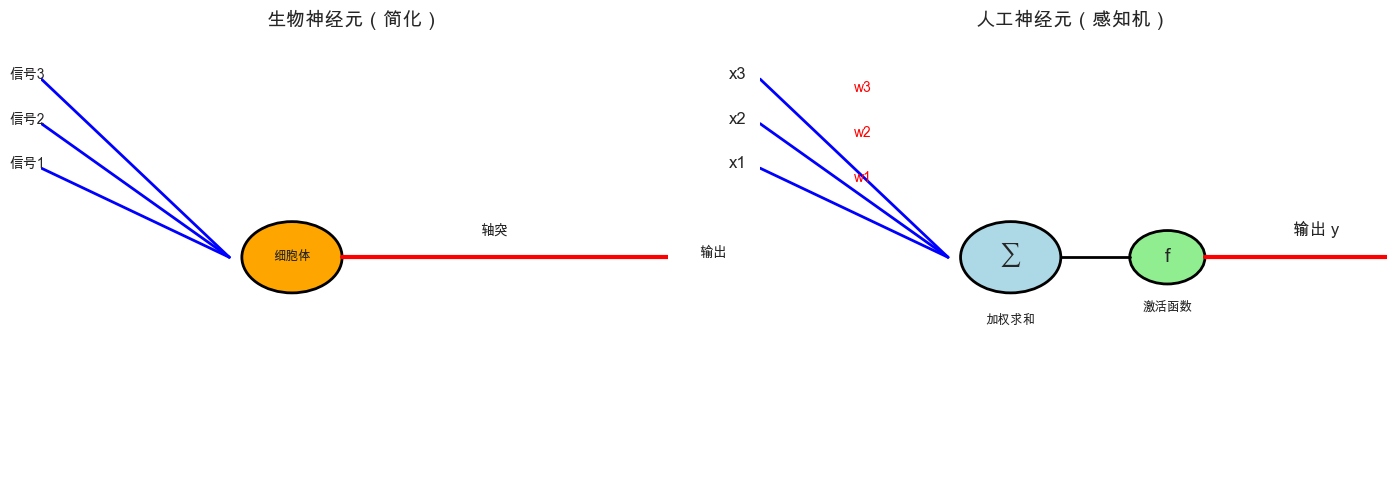


📊 对比：
生物神经元：树突接收信号 → 细胞体整合 → 轴突传递
人工神经元：输入x加权 → 求和+偏置 → 激活函数 → 输出y


In [4]:
# 可视化：生物神经元 vs 人工神经元

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左图：生物神经元（简化示意）
ax1 = axes[0]
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.axis('off')
ax1.set_title('生物神经元（简化）', fontsize=14, fontweight='bold')

# 树突
for i, y in enumerate([7, 8, 9]):
    ax1.plot([0, 3], [y, 5], 'b-', lw=2)
    ax1.text(-0.5, y, f'信号{i+1}', fontsize=10)

# 细胞体
soma = Circle((4, 5), 0.8, color='orange', ec='black', lw=2)
ax1.add_patch(soma)
ax1.text(4, 5, '细胞体', ha='center', va='center', fontsize=9, fontweight='bold')

# 轴突
ax1.plot([4.8, 9], [5, 5], 'r-', lw=3)
ax1.text(7, 5.5, '轴突', fontsize=10)

# 输出
ax1.plot([9, 10], [5, 5], 'r-', lw=3)
ax1.text(10.5, 5, '输出', fontsize=10)

# 右图：人工神经元（感知机）
ax2 = axes[1]
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.axis('off')
ax2.set_title('人工神经元（感知机）', fontsize=14, fontweight='bold')

# 输入
for i, y in enumerate([7, 8, 9]):
    ax2.plot([0, 3], [y, 5], 'b-', lw=2)
    ax2.text(-0.5, y, f'x{i+1}', fontsize=12)
    ax2.text(1.5, y-0.3, f'w{i+1}', fontsize=10, color='red')

# 求和节点
sum_node = Circle((4, 5), 0.8, color='lightblue', ec='black', lw=2)
ax2.add_patch(sum_node)
ax2.text(4, 5, '∑', ha='center', va='center', fontsize=20, fontweight='bold')
ax2.text(4, 3.5, '加权求和', ha='center', fontsize=9)

# 激活函数
act_node = Circle((6.5, 5), 0.6, color='lightgreen', ec='black', lw=2)
ax2.add_patch(act_node)
ax2.text(6.5, 5, 'f', ha='center', va='center', fontsize=14, fontweight='bold')
ax2.text(6.5, 3.8, '激活函数', ha='center', fontsize=9)

# 连接
ax2.plot([4.8, 5.9], [5, 5], 'k-', lw=2)
ax2.plot([7.1, 10], [5, 5], 'r-', lw=3)
ax2.text(8.5, 5.5, '输出 y', fontsize=12)

plt.tight_layout()
plt.show()

print("\n📊 对比：")
print("生物神经元：树突接收信号 → 细胞体整合 → 轴突传递")
print("人工神经元：输入x加权 → 求和+偏置 → 激活函数 → 输出y")

---

## 2. 感知机（Perceptron）模型

### 2.1 Rosenblatt感知机（1958）

**Frank Rosenblatt** 提出的感知机是第一个可以**自动学习**的神经网络模型。

**数学定义：**

对于输入向量 $\mathbf{x} = [x_1, x_2, \ldots, x_n]^T$：

1. **加权求和：**
   $$z = \mathbf{w}^T \mathbf{x} + b = \sum_{i=1}^{n} w_i x_i + b$$

2. **激活函数（阶跃函数）：**
   $$y = \text{sign}(z) = \begin{cases}
   1, & \text{if } z \geq 0 \\
   -1, & \text{if } z < 0
   \end{cases}$$

### 2.2 感知机学习算法

**目标：** 找到合适的权重 $\mathbf{w}$ 和偏置 $b$，使得模型能正确分类。

**算法步骤：**

```
1. 初始化权重 w 和偏置 b（通常为0或小随机数）
2. 对于每个训练样本 (x, y_true)：
   a. 计算预测值 y_pred = sign(w^T x + b)
   b. 如果预测错误 (y_pred ≠ y_true)：
      - 更新权重：w ← w + η * y_true * x
      - 更新偏置：b ← b + η * y_true
3. 重复步骤2，直到所有样本都分类正确或达到最大迭代次数
```

其中 $\eta$ 是**学习率**（learning rate），控制每次更新的步长。

**直观理解更新规则：**
- 如果预测正确：不更新
- 如果预测错误：
  - $y_{\text{true}} = 1, y_{\text{pred}} = -1$：增加权重（向正确方向调整）
  - $y_{\text{true}} = -1, y_{\text{pred}} = 1$：减少权重（向正确方向调整）

---

In [3]:
# 从零实现感知机

class Perceptron:
    """
    感知机分类器
    
    参数:
        learning_rate: 学习率，默认0.01
        n_iterations: 最大迭代次数，默认1000
        random_state: 随机种子
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, random_state=None):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.random_state = random_state
        
        # 权重和偏置（训练后会设置）
        self.weights = None  # shape: (n_features,)
        self.bias = None     # 标量
        
        # 记录训练历史
        self.errors_history = []  # 每轮的错误数量
    
    def fit(self, X, y):
        """
        训练感知机
        
        参数:
            X: 训练数据, shape (n_samples, n_features)
            y: 标签, shape (n_samples,), 值为{-1, 1}
        """
        n_samples, n_features = X.shape
        
        # 初始化权重和偏置
        # 权重初始化为0（也可以用小随机数）
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        self.weights = np.zeros(n_features)  # 初始化为0
        self.bias = 0.0
        
        # 训练循环
        for iteration in range(self.n_iterations):
            errors = 0  # 当前轮的错误数
            
            # 遍历每个训练样本
            for i in range(n_samples):
                # 获取单个样本和标签
                x_i = X[i]      # shape: (n_features,)
                y_true = y[i]   # 标量: -1 或 1
                
                # 1. 计算加权和：z = w^T x + b
                z = np.dot(self.weights, x_i) + self.bias
                
                # 2. 激活函数（阶跃函数）：y_pred = sign(z)
                y_pred = 1 if z >= 0 else -1
                
                # 3. 检查是否预测错误
                if y_pred != y_true:
                    # 感知机学习规则：
                    # w ← w + η * y_true * x
                    # b ← b + η * y_true
                    update = self.learning_rate * y_true
                    self.weights += update * x_i
                    self.bias += update
                    
                    errors += 1  # 记录错误
            
            # 记录本轮的错误数
            self.errors_history.append(errors)
            
            # 如果所有样本都分类正确，提前停止
            if errors == 0:
                print(f"✅ 训练在第 {iteration + 1} 轮收敛（所有样本分类正确）")
                break
        else:
            # 达到最大迭代次数
            print(f"⚠️ 达到最大迭代次数 {self.n_iterations}，最后一轮错误数: {errors}")
        
        return self
    
    def predict(self, X):
        """
        预测
        
        参数:
            X: 测试数据, shape (n_samples, n_features)
        
        返回:
            y_pred: 预测标签, shape (n_samples,)
        """
        # 计算加权和：z = X @ w + b
        # X: (n_samples, n_features)
        # weights: (n_features,)
        # 结果: (n_samples,)
        z = np.dot(X, self.weights) + self.bias
        
        # 应用阶跃函数
        y_pred = np.where(z >= 0, 1, -1)
        
        return y_pred
    
    def score(self, X, y):
        """
        计算准确率
        
        参数:
            X: 数据, shape (n_samples, n_features)
            y: 真实标签, shape (n_samples,)
        
        返回:
            accuracy: 准确率 [0, 1]
        """
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy


print("✅ 感知机类定义完成！")
print("\n核心方法:")
print("  - fit(X, y): 训练模型")
print("  - predict(X): 预测")
print("  - score(X, y): 计算准确率")

✅ 感知机类定义完成！

核心方法:
  - fit(X, y): 训练模型
  - predict(X): 预测
  - score(X, y): 计算准确率


---

## 3. 实战：逻辑门分类

### 3.1 AND逻辑门

**真值表：**

| x₁ | x₂ | AND |
|----|----|-----|
| 0  | 0  |  0  |
| 0  | 1  |  0  |
| 1  | 0  |  0  |
| 1  | 1  |  1  |

**问题：** 这是一个**线性可分**的问题吗？

**答案：** 是的！可以用一条直线分开。

---

In [6]:
# 定义AND逻辑门数据

# 输入: (x1, x2)
X_and = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# 标签: AND的输出，映射到 {-1, 1}
# 0 → -1, 1 → 1
y_and = np.array([-1, -1, -1, 1])

print("AND逻辑门数据：")
print("\nX:")
print(X_and)
print("\ny (标签):")
print(y_and)

# 训练感知机
print("\n" + "="*50)
print("训练感知机...")
print("="*50)

perceptron_and = Perceptron(learning_rate=0.1, n_iterations=100, random_state=42)
perceptron_and.fit(X_and, y_and)

# 测试
print("\n" + "="*50)
print("测试结果：")
print("="*50)

y_pred = perceptron_and.predict(X_and)
print("\n真实标签:", y_and)
print("预测标签:", y_pred)
print(f"\n准确率: {perceptron_and.score(X_and, y_and) * 100:.1f}%")

# 查看学到的参数
print("\n学到的参数：")
print(f"  权重 w = {perceptron_and.weights}")
print(f"  偏置 b = {perceptron_and.bias:.4f}")
print(f"\n决策边界方程: {perceptron_and.weights[0]:.4f}*x1 + {perceptron_and.weights[1]:.4f}*x2 + {perceptron_and.bias:.4f} = 0")

AND逻辑门数据：

X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

y (标签):
[-1 -1 -1  1]

训练感知机...
✅ 训练在第 4 轮收敛（所有样本分类正确）

测试结果：

真实标签: [-1 -1 -1  1]
预测标签: [-1 -1 -1  1]

准确率: 100.0%

学到的参数：
  权重 w = [0.2 0.1]
  偏置 b = -0.2000

决策边界方程: 0.2000*x1 + 0.1000*x2 + -0.2000 = 0


In [9]:
# 可视化AND逻辑门的决策边界

def plot_decision_boundary(X, y, model, title):
    """
    绘制2D分类问题的决策边界
    
    参数:
        X: 数据点, shape (n_samples, 2)
        y: 标签, shape (n_samples,)
        model: 训练好的模型（需要有weights和bias属性）
        title: 图表标题
    """
    plt.figure(figsize=(8, 6))
    
    # 绘制数据点
    # 正类（y=1）用红色圆圈，负类（y=-1）用蓝色叉
    for label, marker, color in [(1, 'o', 'red'), (-1, 'x', 'blue')]:
        mask = (y == label)
        plt.scatter(X[mask, 0], X[mask, 1], 
                   marker=marker, c=color, s=200, 
                   label=f'y = {label}', edgecolors='black', linewidths=2)
    
    # 绘制决策边界
    # 决策边界: w1*x1 + w2*x2 + b = 0
    # => x2 = -(w1*x1 + b) / w2
    
    w1, w2 = model.weights
    b = model.bias
    
    # 在x1的范围内绘制决策边界
    x1_vals = np.linspace(-0.5, 1.5, 100)
    
    # 计算对应的x2值
    # 决策边界: w1*x1 + w2*x2 + b = 0
    # x2 = -(w1*x1 + b) / w2
    if w2 != 0:
        x2_vals = -(w1 * x1_vals + b) / w2
        plt.plot(x1_vals, x2_vals, 'g--', lw=2, label='决策边界')
    else:
        # w2=0时，边界是垂直线 x1 = -b/w1
        x1_boundary = -b / w1
        plt.axvline(x1_boundary, color='g', linestyle='--', lw=2, label='决策边界')
    
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.xlabel('x₁', fontsize=14)
    plt.ylabel('x₂', fontsize=14)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

# 绘制AND逻辑门的决策边界
plot_decision_boundary(X_and, y_and, perceptron_and, 'AND逻辑门 - 感知机决策边界')

NameError: name 'X_and' is not defined

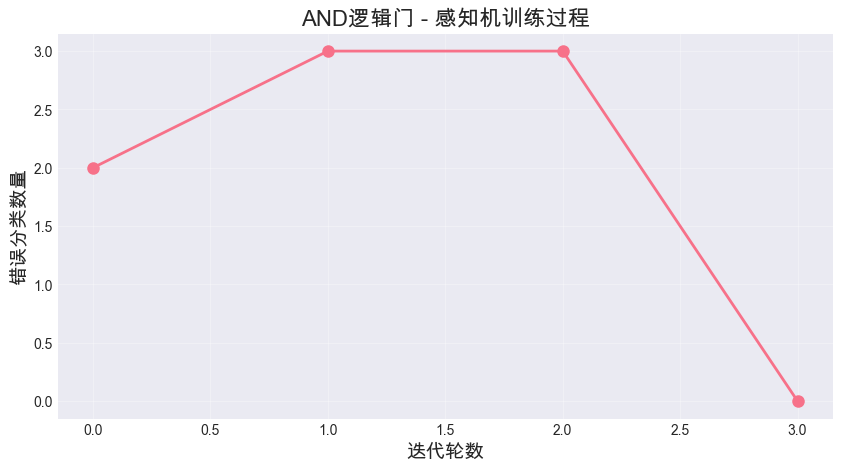

总迭代轮数: 4
初始错误数: 2
最终错误数: 0


In [8]:
# 可视化训练过程

plt.figure(figsize=(10, 5))
plt.plot(perceptron_and.errors_history, marker='o', linewidth=2, markersize=8)
plt.xlabel('迭代轮数', fontsize=14)
plt.ylabel('错误分类数量', fontsize=14)
plt.title('AND逻辑门 - 感知机训练过程', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print(f"总迭代轮数: {len(perceptron_and.errors_history)}")
print(f"初始错误数: {perceptron_and.errors_history[0]}")
print(f"最终错误数: {perceptron_and.errors_history[-1]}")

### 3.2 OR逻辑门

**真值表：**

| x₁ | x₂ | OR  |
|----|----|-----|
| 0  | 0  |  0  |
| 0  | 1  |  1  |
| 1  | 0  |  1  |
| 1  | 1  |  1  |

---

OR逻辑门数据：
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [-1  1  1  1]
✅ 训练在第 4 轮收敛（所有样本分类正确）

准确率: 100.0%
学到的参数: w = [0.1 0.1], b = -0.1000


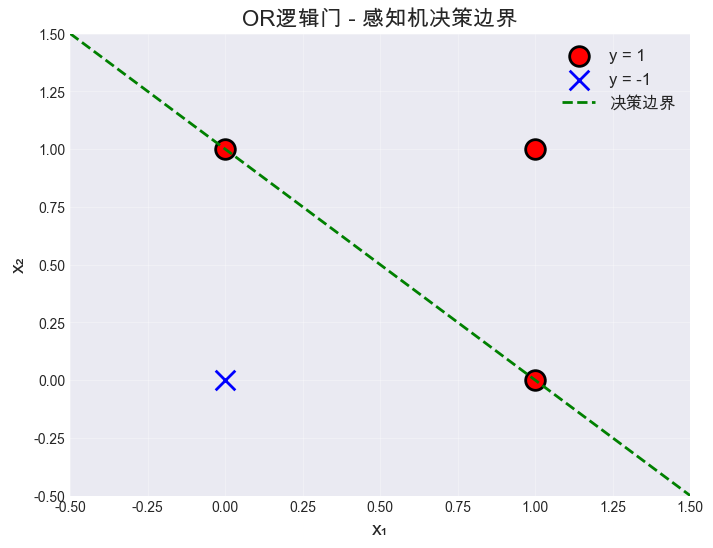

In [9]:
# OR逻辑门

X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([-1, 1, 1, 1])

print("OR逻辑门数据：")
print("X:", X_or)
print("y:", y_or)

# 训练
perceptron_or = Perceptron(learning_rate=0.1, n_iterations=100, random_state=42)
perceptron_or.fit(X_or, y_or)

# 测试
print(f"\n准确率: {perceptron_or.score(X_or, y_or) * 100:.1f}%")
print(f"学到的参数: w = {perceptron_or.weights}, b = {perceptron_or.bias:.4f}")

# 可视化
plot_decision_boundary(X_or, y_or, perceptron_or, 'OR逻辑门 - 感知机决策边界')

---

## 4. 单层感知机的局限性：XOR问题

### 4.1 XOR逻辑门

**真值表：**

| x₁ | x₂ | XOR |
|----|----|-----|
| 0  | 0  |  0  |
| 0  | 1  |  1  |
| 1  | 0  |  1  |
| 1  | 1  |  0  |

**关键问题：** 这个问题是**线性可分**的吗？

**答案：** ❌ **不是！** 无法用一条直线将正类和负类分开。

### 4.2 为什么单层感知机无法解决XOR？

**几何直觉：**
- AND和OR问题：正类和负类可以用一条直线分开（线性可分）
- XOR问题：正类（(0,1)和(1,0)）和负类（(0,0)和(1,1)）**无法用一条直线分开**（线性不可分）

**数学证明：**

假设存在线性决策边界 $w_1 x_1 + w_2 x_2 + b = 0$，那么：

- 点 (0, 0) 属于负类 → $b < 0$
- 点 (0, 1) 属于正类 → $w_2 + b > 0$
- 点 (1, 0) 属于正类 → $w_1 + b > 0$
- 点 (1, 1) 属于负类 → $w_1 + w_2 + b < 0$

从前三个条件：$w_1 + w_2 > -2b > 0$

但这与第四个条件 $w_1 + w_2 + b < 0$ 矛盾（因为 $b < 0$）！

**结论：** 单层感知机无法解决XOR问题。

---

In [10]:
# XOR逻辑门 - 验证单层感知机无法解决

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([-1, 1, 1, -1])  # XOR的输出

print("XOR逻辑门数据：")
print("\nX:")
print(X_xor)
print("\ny (标签):")
print(y_xor)

# 尝试训练感知机
print("\n" + "="*50)
print("尝试训练感知机...")
print("="*50)

perceptron_xor = Perceptron(learning_rate=0.1, n_iterations=100, random_state=42)
perceptron_xor.fit(X_xor, y_xor)

# 测试
y_pred = perceptron_xor.predict(X_xor)
print("\n真实标签:", y_xor)
print("预测标签:", y_pred)
print(f"\n准确率: {perceptron_xor.score(X_xor, y_xor) * 100:.1f}%")

print("\n❌ 结论: 单层感知机无法完美解决XOR问题！")

XOR逻辑门数据：

X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

y (标签):
[-1  1  1 -1]

尝试训练感知机...
⚠️ 达到最大迭代次数 100，最后一轮错误数: 4

真实标签: [-1  1  1 -1]
预测标签: [ 1  1 -1 -1]

准确率: 50.0%

❌ 结论: 单层感知机无法完美解决XOR问题！


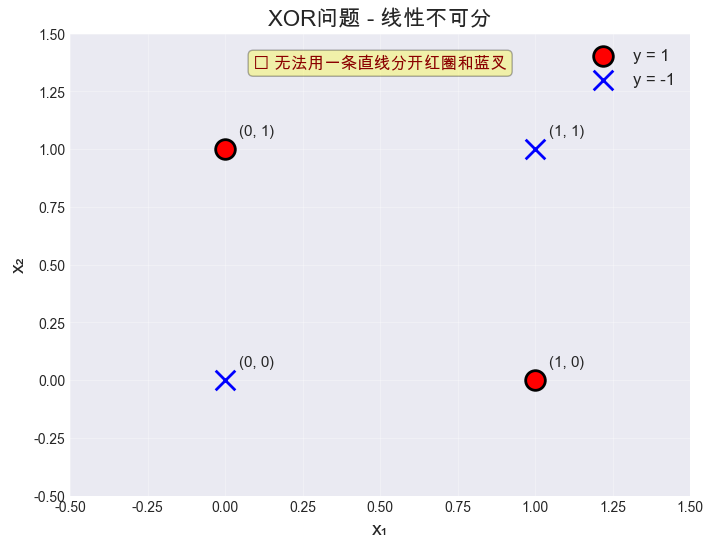


🔍 观察：
  - 正类（红色圆圈）：(0, 1) 和 (1, 0) - 对角位置
  - 负类（蓝色叉号）：(0, 0) 和 (1, 1) - 对角位置
  - 无法用一条直线将它们分开！


In [11]:
# 可视化XOR问题的线性不可分性

plt.figure(figsize=(8, 6))

# 绘制数据点
for label, marker, color in [(1, 'o', 'red'), (-1, 'x', 'blue')]:
    mask = (y_xor == label)
    plt.scatter(X_xor[mask, 0], X_xor[mask, 1], 
               marker=marker, c=color, s=200, 
               label=f'y = {label}', edgecolors='black', linewidths=2)

# 标注每个点
for i, (x1, x2) in enumerate(X_xor):
    plt.annotate(f'({x1}, {x2})', (x1, x2), 
                textcoords="offset points", xytext=(10, 10), fontsize=11)

# 尝试绘制感知机学到的决策边界（虽然它无法正确分类）
w1, w2 = perceptron_xor.weights
b = perceptron_xor.bias

x1_vals = np.linspace(-0.5, 1.5, 100)
if w2 != 0:
    x2_vals = -(w1 * x1_vals + b) / w2
    plt.plot(x1_vals, x2_vals, 'g--', lw=2, label='感知机的决策边界（不正确）', alpha=0.7)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x₁', fontsize=14)
plt.ylabel('x₂', fontsize=14)
plt.title('XOR问题 - 线性不可分', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# 添加说明
plt.text(0.5, 1.35, '❌ 无法用一条直线分开红圈和蓝叉', 
         ha='center', fontsize=12, color='darkred', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.show()

print("\n🔍 观察：")
print("  - 正类（红色圆圈）：(0, 1) 和 (1, 0) - 对角位置")
print("  - 负类（蓝色叉号）：(0, 0) 和 (1, 1) - 对角位置")
print("  - 无法用一条直线将它们分开！")

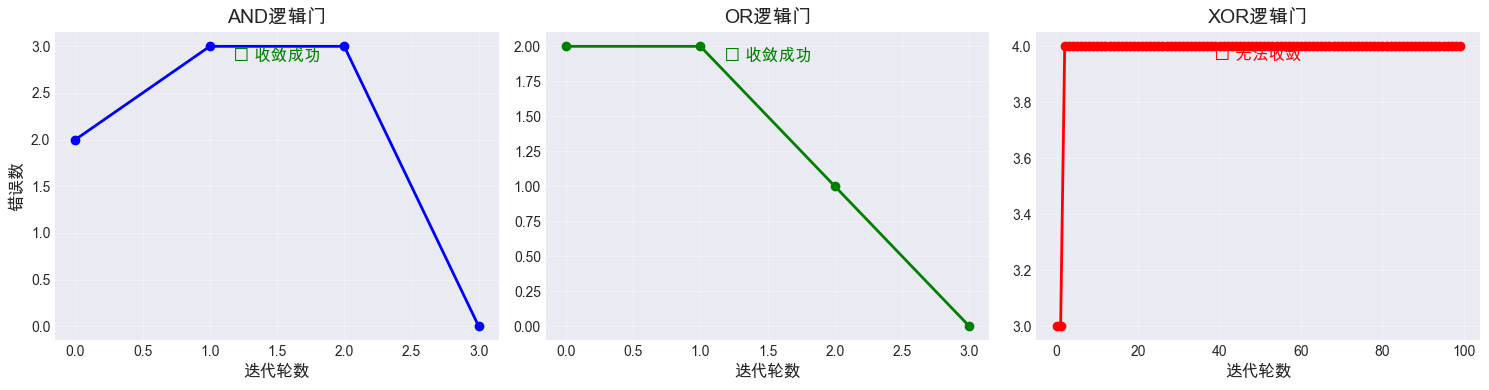


📊 总结：
  - AND和OR: 线性可分 → 感知机可以完美解决
  - XOR: 线性不可分 → 感知机无法解决
  - 解决方案: 使用多层神经网络！（下一章）


In [12]:
# 对比AND、OR、XOR的训练过程

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# AND
axes[0].plot(perceptron_and.errors_history, marker='o', linewidth=2, markersize=6, color='blue')
axes[0].set_title('AND逻辑门', fontsize=14, fontweight='bold')
axes[0].set_xlabel('迭代轮数', fontsize=12)
axes[0].set_ylabel('错误数', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].text(0.5, 0.95, '✅ 收敛成功', transform=axes[0].transAxes, 
            ha='center', va='top', fontsize=12, color='green', fontweight='bold')

# OR
axes[1].plot(perceptron_or.errors_history, marker='o', linewidth=2, markersize=6, color='green')
axes[1].set_title('OR逻辑门', fontsize=14, fontweight='bold')
axes[1].set_xlabel('迭代轮数', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].text(0.5, 0.95, '✅ 收敛成功', transform=axes[1].transAxes, 
            ha='center', va='top', fontsize=12, color='green', fontweight='bold')

# XOR
axes[2].plot(perceptron_xor.errors_history, marker='o', linewidth=2, markersize=6, color='red')
axes[2].set_title('XOR逻辑门', fontsize=14, fontweight='bold')
axes[2].set_xlabel('迭代轮数', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].text(0.5, 0.95, '❌ 无法收敛', transform=axes[2].transAxes, 
            ha='center', va='top', fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 总结：")
print("  - AND和OR: 线性可分 → 感知机可以完美解决")
print("  - XOR: 线性不可分 → 感知机无法解决")
print("  - 解决方案: 使用多层神经网络！（下一章）")

---

## 5. 神经网络发展历史

### 5.1 第一次浪潮：感知机时代（1950s-1960s）

**里程碑事件：**
- **1943**: McCulloch & Pitts 提出第一个神经元模型
- **1958**: Rosenblatt 发明感知机（Perceptron）
- **1960**: Widrow & Hoff 提出ADALINE（自适应线性神经元）

**乐观情绪：**
> "感知机将能够识别人、呼叫名字、复制自己并意识到自己的存在" - Rosenblatt (1958)

### 5.2 第一次AI寒冬（1969-1980s）

**触发事件：**
- **1969**: Minsky & Papert 出版《Perceptrons》一书
- 证明单层感知机无法解决XOR等简单问题
- 指出多层网络没有有效的训练算法

**影响：**
- 神经网络研究几乎停滞
- 资金大幅削减
- 研究人员转向其他方向（专家系统、逻辑推理）

### 5.3 第二次浪潮：反向传播的突破（1980s-1990s）

**关键突破：**
- **1986**: Rumelhart, Hinton, Williams 普及**反向传播算法**
- 解决了多层网络的训练问题！
- 证明多层网络可以逼近任意函数（**万能逼近定理**）

**成功应用：**
- 手写数字识别（LeCun的LeNet，1989）
- 语音识别
- 时间序列预测

### 5.4 第二次AI寒冬（1990s-2000s）

**问题：**
- 深层网络难以训练（梯度消失/爆炸）
- 计算能力不足
- 数据量有限
- SVM、随机森林等传统方法表现更好

### 5.5 第三次浪潮：深度学习革命（2006-至今）

**关键突破：**

1. **2006**: Hinton等人提出**深度信念网络（DBN）**和**逐层预训练**
   - 解决深层网络训练问题

2. **2009**: Fei-Fei Li等人发布**ImageNet数据集**
   - 120万张标注图像，1000个类别

3. **2012**: AlexNet在ImageNet竞赛中大幅领先传统方法
   - Top-5错误率从26%降到16%
   - 证明深度学习的威力

4. **2014-2015**: 
   - VGGNet、GoogLeNet、ResNet
   - 网络深度达到100+层

5. **2016-2018**:
   - AlphaGo击败李世石和柯洁
   - Transformer架构（Attention is All You Need）
   - BERT、GPT等大语言模型

6. **2020-至今**:
   - GPT-3、GPT-4（大规模语言模型）
   - DALL-E、Stable Diffusion（图像生成）
   - ChatGPT引发AI应用爆发

**成功的三要素：**
1. **大数据**：互联网时代积累的海量数据
2. **大算力**：GPU、TPU等专用硬件
3. **新算法**：ReLU、Batch Norm、Dropout、Attention等

### 5.6 时间线总结

```
1943  McCulloch-Pitts神经元
1958  感知机（Rosenblatt）
      ↓
1969  《Perceptrons》批评 → 第一次寒冬
      ↓
1986  反向传播算法普及
1989  LeNet（卷积神经网络）
      ↓
1990s SVM等方法占优 → 第二次寒冬
      ↓
2006  深度信念网络
2012  AlexNet → 深度学习爆发
2014  VGG、GoogLeNet
2015  ResNet（152层）
2016  AlphaGo
2017  Transformer
2018  BERT、GPT
2020  GPT-3
2022  ChatGPT
2023  GPT-4、多模态大模型
```

---

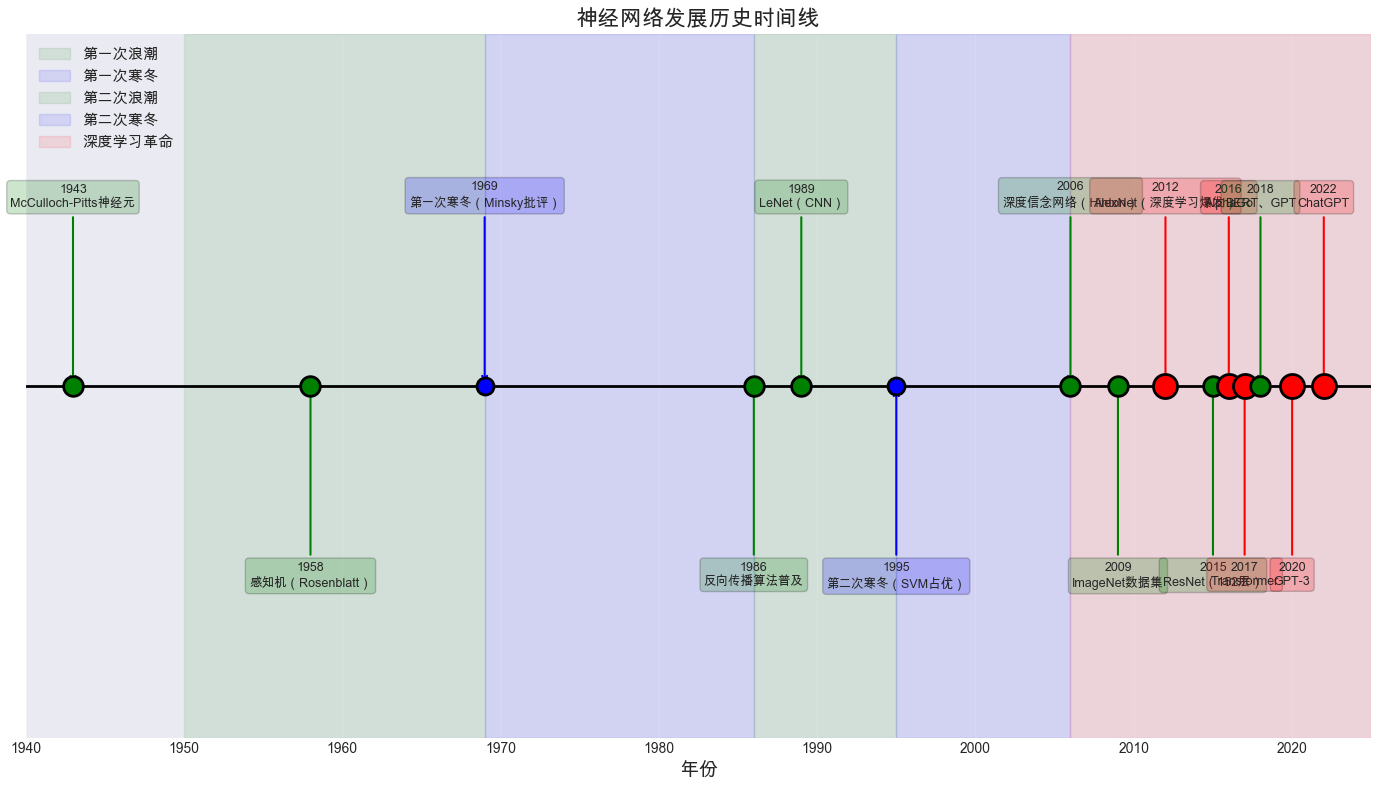


🔍 关键洞察：
  1. 神经网络经历了两次寒冬和三次浪潮
  2. 每次寒冬都是因为技术局限（单层→无训练算法→算力/数据不足）
  3. 每次复兴都是因为算法突破（反向传播→预训练→大规模应用）
  4. 2012年AlexNet是深度学习真正爆发的起点
  5. 当前（2020s）是深度学习的黄金时代


In [13]:
# 可视化神经网络发展历史

fig, ax = plt.subplots(figsize=(14, 8))

# 时间线数据
events = [
    (1943, "McCulloch-Pitts神经元", 3),
    (1958, "感知机（Rosenblatt）", 4),
    (1969, "第一次寒冬（Minsky批评）", 1),
    (1986, "反向传播算法普及", 4),
    (1989, "LeNet（CNN）", 3),
    (1995, "第二次寒冬（SVM占优）", 1),
    (2006, "深度信念网络（Hinton）", 3),
    (2009, "ImageNet数据集", 3),
    (2012, "AlexNet（深度学习爆发）", 5),
    (2015, "ResNet（152层）", 4),
    (2016, "AlphaGo", 5),
    (2017, "Transformer", 5),
    (2018, "BERT、GPT", 4),
    (2020, "GPT-3", 5),
    (2022, "ChatGPT", 5),
]

# 分离数据
years = [e[0] for e in events]
labels = [e[1] for e in events]
importance = [e[2] for e in events]  # 1=寒冬, 3-5=重要事件

# 绘制时间线
ax.plot([1940, 2025], [0, 0], 'k-', lw=2)

# 绘制事件
for year, label, imp in events:
    # 根据重要性选择颜色
    if imp == 1:  # 寒冬
        color = 'blue'
        marker_size = 150
    elif imp == 5:  # 重大突破
        color = 'red'
        marker_size = 300
    else:
        color = 'green'
        marker_size = 200
    
    # 绘制事件点
    ax.scatter(year, 0, s=marker_size, c=color, zorder=5, edgecolors='black', linewidths=2)
    
    # 添加标签（交替上下显示）
    y_offset = 0.15 if events.index((year, label, imp)) % 2 == 0 else -0.15
    ax.annotate(f"{year}\n{label}", 
               xy=(year, 0), 
               xytext=(year, y_offset),
               ha='center', va='bottom' if y_offset > 0 else 'top',
               fontsize=9,
               bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.2),
               arrowprops=dict(arrowstyle='->', lw=1.5, color=color))

# 标注阶段
ax.axvspan(1950, 1969, alpha=0.1, color='green', label='第一次浪潮')
ax.axvspan(1969, 1986, alpha=0.1, color='blue', label='第一次寒冬')
ax.axvspan(1986, 1995, alpha=0.1, color='green', label='第二次浪潮')
ax.axvspan(1995, 2006, alpha=0.1, color='blue', label='第二次寒冬')
ax.axvspan(2006, 2025, alpha=0.1, color='red', label='深度学习革命')

ax.set_xlim(1940, 2025)
ax.set_ylim(-0.3, 0.3)
ax.set_xlabel('年份', fontsize=14)
ax.set_title('神经网络发展历史时间线', fontsize=16, fontweight='bold')
ax.set_yticks([])
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 关键洞察：")
print("  1. 神经网络经历了两次寒冬和三次浪潮")
print("  2. 每次寒冬都是因为技术局限（单层→无训练算法→算力/数据不足）")
print("  3. 每次复兴都是因为算法突破（反向传播→预训练→大规模应用）")
print("  4. 2012年AlexNet是深度学习真正爆发的起点")
print("  5. 当前（2020s）是深度学习的黄金时代")

---

## 6. 从单层到多层：解决XOR问题

### 6.1 多层感知机（MLP）

**关键思想：** 使用**多层网络**可以解决XOR等线性不可分问题。

**XOR的多层解决方案：**

```
输入层      隐藏层        输出层
         
  x1  ──→  h1  ──→
       ╲  ╱  ╲        y
        ╳     ╳  ──→
       ╱  ╲  ╱
  x2  ──→  h2  ──→
```

**直观理解：**
- 隐藏层可以学习到更复杂的特征表示
- 相当于先进行**特征变换**，再进行线性分类

**简单演示（手工设计权重）：**

将XOR分解为：
- $h_1 = x_1 \text{ OR } x_2$
- $h_2 = \text{NOT}(x_1 \text{ AND } x_2)$
- $y = h_1 \text{ AND } h_2$

---

In [14]:
# 手工设计一个2层网络来解决XOR问题

def manual_xor_network(x1, x2):
    """
    手工设计的2层网络解决XOR
    
    网络结构:
        输入层: x1, x2
        隐藏层: h1 (OR), h2 (NAND)
        输出层: y (AND)
    
    XOR = (x1 OR x2) AND (NOT(x1 AND x2))
        = (x1 OR x2) AND (x1 NAND x2)
    """
    # 隐藏层1: OR门
    # w1 = [1, 1], b1 = -0.5
    # h1 = 1 if (x1 + x2 - 0.5 >= 0) else 0
    h1 = 1 if (x1 + x2 - 0.5 >= 0) else 0
    
    # 隐藏层2: NAND门（NOT AND）
    # w2 = [-1, -1], b2 = 1.5
    # h2 = 1 if (-x1 - x2 + 1.5 >= 0) else 0
    h2 = 1 if (-x1 - x2 + 1.5 >= 0) else 0
    
    # 输出层: AND门
    # w3 = [1, 1], b3 = -1.5
    # y = 1 if (h1 + h2 - 1.5 >= 0) else 0
    y = 1 if (h1 + h2 - 1.5 >= 0) else 0
    
    return y, h1, h2


# 测试XOR
print("手工设计的2层网络解决XOR：\n")
print("x1  x2  |  h1(OR)  h2(NAND)  |  y(XOR)")
print("="*45)

for x1 in [0, 1]:
    for x2 in [0, 1]:
        y, h1, h2 = manual_xor_network(x1, x2)
        print(f" {x1}   {x2}  |    {h1}       {h2}      |    {y}")

print("\n✅ 多层网络成功解决XOR问题！")
print("\n💡 关键洞察:")
print("  - 隐藏层h1学习OR逻辑")
print("  - 隐藏层h2学习NAND逻辑（NOT AND）")
print("  - 输出层结合h1和h2得到XOR")
print("  - 多层网络可以表示更复杂的函数！")

手工设计的2层网络解决XOR：

x1  x2  |  h1(OR)  h2(NAND)  |  y(XOR)
 0   0  |    0       1      |    0
 0   1  |    1       1      |    1
 1   0  |    1       1      |    1
 1   1  |    1       0      |    0

✅ 多层网络成功解决XOR问题！

💡 关键洞察:
  - 隐藏层h1学习OR逻辑
  - 隐藏层h2学习NAND逻辑（NOT AND）
  - 输出层结合h1和h2得到XOR
  - 多层网络可以表示更复杂的函数！


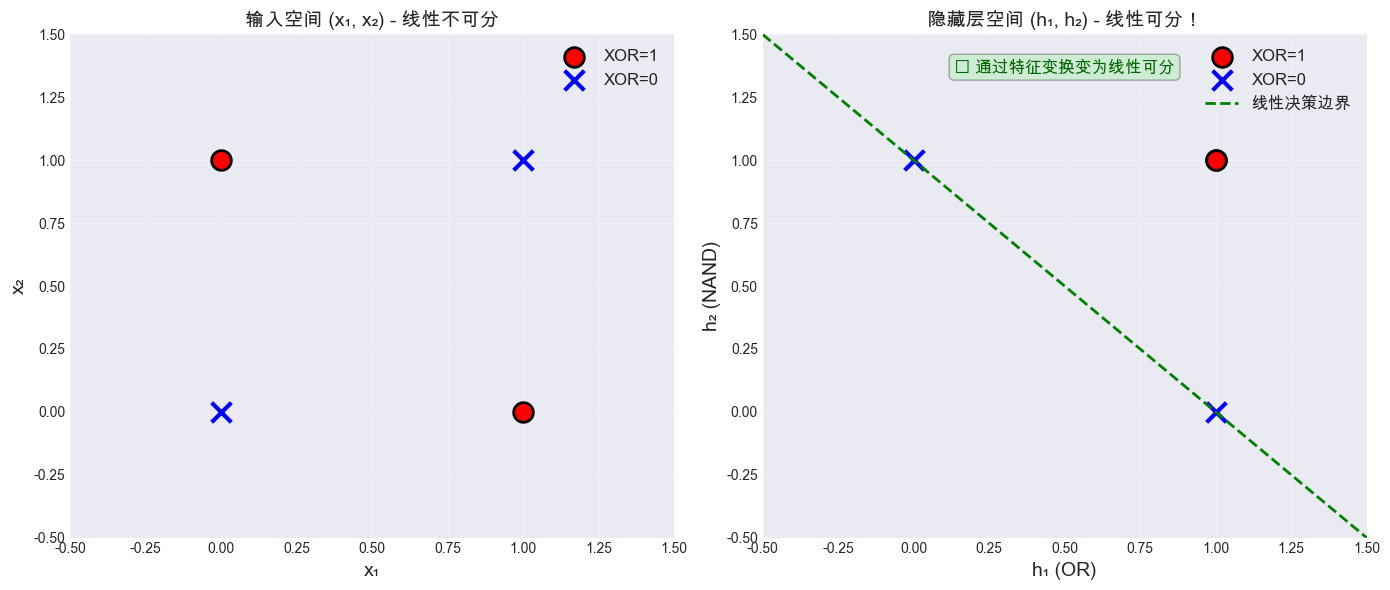


🔍 关键洞察:
  - 左图: 在原始输入空间(x1, x2)中，XOR线性不可分
  - 右图: 隐藏层将数据变换到新空间(h1, h2)，变为线性可分！
  - 多层网络 = 特征变换 + 线性分类
  - 这就是深度学习的核心思想：学习有用的特征表示


In [16]:
# 可视化：多层网络的特征变换

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 左图：原始输入空间（x1, x2）
ax1 = axes[0]
ax1.scatter([0, 1], [1, 0], c='red', s=200, marker='o', label='XOR=1', edgecolors='black', linewidths=2)
ax1.scatter([0, 1], [0, 1], c='blue', s=200, marker='x', label='XOR=0', linewidths=3)
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 1.5)
ax1.set_xlabel('x₁', fontsize=14)
ax1.set_ylabel('x₂', fontsize=14)
ax1.set_title('输入空间 (x₁, x₂) - 线性不可分', fontsize=14, fontweight='bold')
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# 右图：隐藏层空间（h1, h2）
ax2 = axes[1]

# 计算隐藏层表示
hidden_representations = []
xor_labels = []
for x1 in [0, 1]:
    for x2 in [0, 1]:
        y, h1, h2 = manual_xor_network(x1, x2)
        hidden_representations.append([h1, h2])
        xor_labels.append(y)

hidden_representations = np.array(hidden_representations)
xor_labels = np.array(xor_labels)

# 绘制隐藏层表示
ax2.scatter(hidden_representations[xor_labels==1, 0], 
           hidden_representations[xor_labels==1, 1],
           c='red', s=200, marker='o', label='XOR=1', edgecolors='black', linewidths=2)
ax2.scatter(hidden_representations[xor_labels==0, 0], 
           hidden_representations[xor_labels==0, 1],
           c='blue', s=200, marker='x', label='XOR=0', linewidths=3)

# 绘制线性分类边界（在隐藏层空间中）
ax2.plot([-0.5, 1.5], [1.5, -0.5], 'g--', lw=2, label='线性决策边界')

ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.5, 1.5)
ax2.set_xlabel('h₁ (OR)', fontsize=14)
ax2.set_ylabel('h₂ (NAND)', fontsize=14)
ax2.set_title('隐藏层空间 (h₁, h₂) - 线性可分！', fontsize=14, fontweight='bold')
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

# 添加说明
ax2.text(0.5, 1.35, '✅ 通过特征变换变为线性可分', 
         ha='center', fontsize=12, color='darkgreen', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))

plt.tight_layout()
plt.show()

print("\n🔍 关键洞察:")
print("  - 左图: 在原始输入空间(x1, x2)中，XOR线性不可分")
print("  - 右图: 隐藏层将数据变换到新空间(h1, h2)，变为线性可分！")
print("  - 多层网络 = 特征变换 + 线性分类")
print("  - 这就是深度学习的核心思想：学习有用的特征表示")

---

## 7. 本章总结

### 7.1 核心要点

✅ **生物神经元 → 人工神经元**
- 树突、细胞体、轴突 → 输入、加权求和、激活函数

✅ **感知机模型**
- 数学模型: $y = \text{sign}(\mathbf{w}^T \mathbf{x} + b)$
- 学习算法: $\mathbf{w} \leftarrow \mathbf{w} + \eta y_{\text{true}} \mathbf{x}$

✅ **单层感知机的局限性**
- 只能解决线性可分问题（AND、OR）
- 无法解决XOR等线性不可分问题

✅ **多层网络的必要性**
- 通过隐藏层进行特征变换
- 可以解决XOR等复杂问题
- 深度学习的基础

✅ **神经网络发展历程**
- 三次浪潮：感知机 → 反向传播 → 深度学习
- 两次寒冬：技术局限导致
- 当前：深度学习黄金时代

### 7.2 下一步

**接下来我们将学习：**
1. **激活函数** - 为什么需要非线性？（第2章）
2. **多层感知机** - 如何构建多层网络？（第3章）
3. **反向传播** - 如何训练多层网络？（第4章）

---

---

## 8. 练习题

### 练习1：实现NAND逻辑门

**任务：** 使用感知机实现NAND逻辑门（NOT AND）

**真值表：**

| x₁ | x₂ | NAND |
|----|----|------|
| 0  | 0  |  1   |
| 0  | 1  |  1   |
| 1  | 0  |  1   |
| 1  | 1  |  0   |

**提示：** NAND是AND的否定。

---

NAND逻辑门数据
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [ 1  1  1 -1]
✅ 训练在第 6 轮收敛（所有样本分类正确）

真实标签: [ 1  1  1 -1]
预测标签: [ 1  1  1 -1]
准确率: 100.0%

学到的参数:
  权重 w = [-0.2 -0.1]
  偏置 b = 0.2000


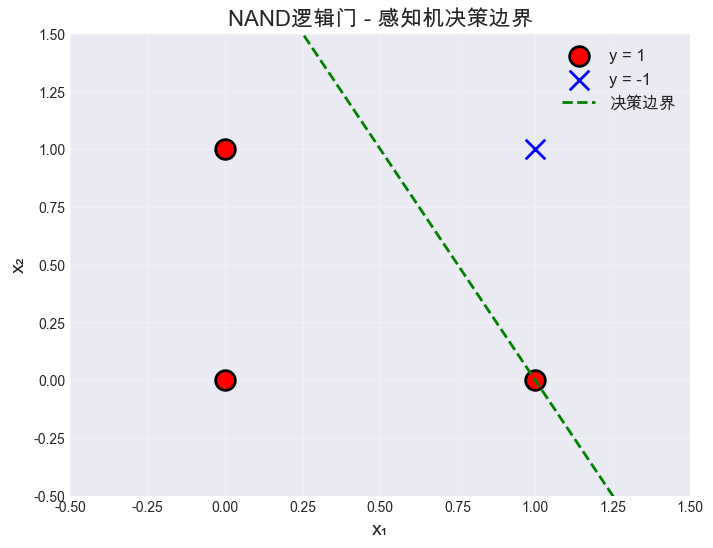

In [10]:
# 练习1：你的代码

# 定义NAND数据
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_nand = np.array([1, 1, 1, -1])  # 注意: 1→1, 0→-1

print("NAND逻辑门数据")
print("X:", X_nand)
print("y:", y_nand)


perceptron_nand = Perceptron(learning_rate=0.1, n_iterations=100, random_state=42)
perceptron_nand.fit(X_nand, y_nand)

y_pred = perceptron_nand.predict(X_nand)
print(f"\n真实标签: {y_nand}")
print(f"预测标签: {y_pred}")
print(f"准确率: {perceptron_nand.score(X_nand, y_nand) * 100:.1f}%")

# 查看学到的参数
print(f"\n学到的参数:")
print(f"  权重 w = {perceptron_nand.weights}")
print(f"  偏置 b = {perceptron_nand.bias:.4f}")

plot_decision_boundary(X_nand, y_nand, perceptron_nand, 'NAND逻辑门 - 感知机决策边界')

### 练习2：分析学习率的影响

**任务：** 在AND逻辑门上测试不同学习率（0.001, 0.01, 0.1, 1.0），观察收敛速度的变化。

**要求：**
1. 训练4个模型，分别使用不同学习率
2. 对比它们的收敛曲线
3. 总结学习率的影响

---

In [ ]:
# 练习2：你的代码

# TODO: 测试不同学习率
learning_rates = [0.001, 0.01, 0.1, 1.0]

# TODO: 训练并对比

### 练习3：理解权重初始化

**任务：** 修改感知机类，尝试不同的权重初始化方法：
1. 全0初始化（当前方法）
2. 小随机数初始化（例如：`np.random.randn(n_features) * 0.01`）
3. 大随机数初始化（例如：`np.random.randn(n_features)`）

**问题：** 权重初始化对感知机的收敛有影响吗？

---

In [ ]:
# 练习3：你的代码

# TODO: 实现不同的初始化方法并对比

### 练习4：真实数据集 - 鸢尾花二分类

**任务：** 使用感知机在鸢尾花数据集上进行二分类

**提示：**
1. 只选择2个类别（线性可分）
2. 只使用2个特征（便于可视化）
3. 将标签映射到{-1, 1}

---

鸢尾花数据集信息：
  特征名: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  类别名: ['setosa' 'versicolor' 'virginica']
  数据形状: (150, 4)

选择后的数据形状: (100, 4)
选择的2个特征后的形状:(100, 2)
[[1.4 0.2]
 [1.4 0.2]]
[0 0]
✅ 训练在第 3 轮收敛（所有样本分类正确）


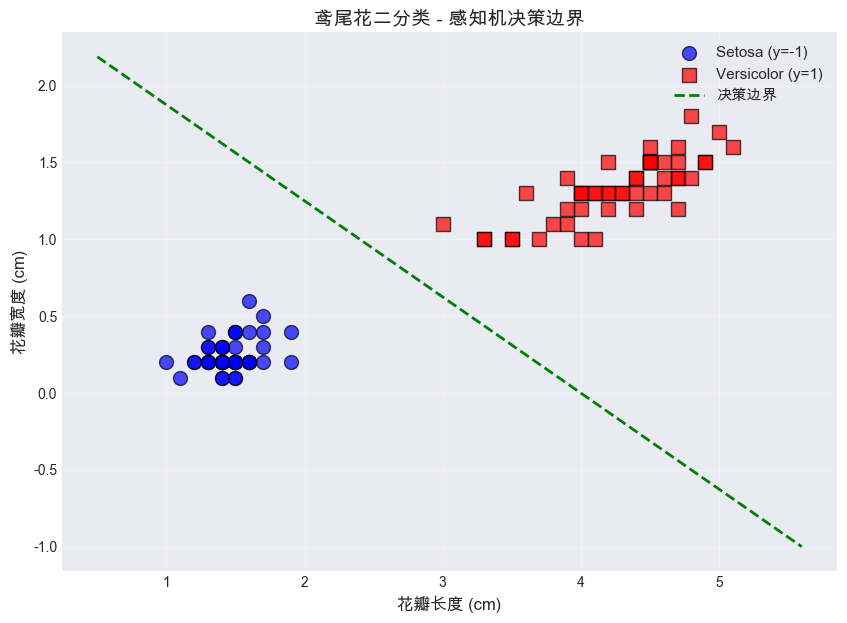

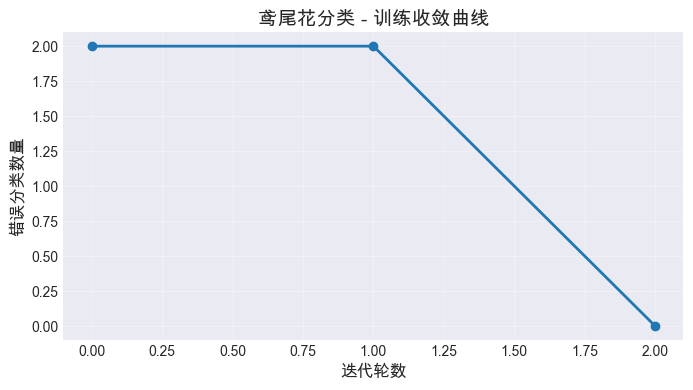


✅ 结论: Setosa和Versicolor是线性可分的，感知机可以完美分类！


In [20]:
# 练习4：你的代码

from sklearn.datasets import load_iris

# 加载数据
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("鸢尾花数据集信息：")
print(f"  特征名: {iris.feature_names}")
print(f"  类别名: {iris.target_names}")
print(f"  数据形状: {X_iris.shape}")

mask = y_iris < 2
X_selected = X_iris[mask]
y_selected = y_iris[mask]
print(f"\n选择后的数据形状: {X_selected.shape}")

X_2d = X_selected[:, [2, 3]]
print(f"选择的2个特征后的形状:{X_2d.shape}")
print(X_2d[: 2])
print(y_selected[:2])
y_mapped = np.where(y_selected == 0, -1, 1)
perceptron_iris = Perceptron(learning_rate=0.1, n_iterations=100, random_state=42)
perceptron_iris.fit(X_2d, y_mapped)

y_pred = perceptron_iris.predict(X_2d)
accuracy = perceptron_iris.score(X_2d, y_mapped)

plt.figure(figsize=(10, 7))

# 绘制数据点
for label, name, marker, color in [(-1, 'Setosa', 'o', 'blue'),
                                  (1, 'Versicolor', 's', 'red')]:
  mask = (y_mapped == label)
  plt.scatter(X_2d[mask, 0], X_2d[mask, 1],
             marker=marker, c=color, s=100,
             label=f'{name} (y={label})', edgecolors='black', alpha=0.7)

# 绘制决策边界
w1, w2 = perceptron_iris.weights
b = perceptron_iris.bias

x1_range = np.linspace(X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5, 100)
if w2 != 0:
  x2_boundary = -(w1 * x1_range + b) / w2
  plt.plot(x1_range, x2_boundary, 'g--', lw=2, label='决策边界')

plt.xlabel('花瓣长度 (cm)', fontsize=12)
plt.ylabel('花瓣宽度 (cm)', fontsize=12)
plt.title('鸢尾花二分类 - 感知机决策边界', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# 训练过程可视化
plt.figure(figsize=(8, 4))
plt.plot(perceptron_iris.errors_history, marker='o', linewidth=2, markersize=6)
plt.xlabel('迭代轮数', fontsize=12)
plt.ylabel('错误分类数量', fontsize=12)
plt.title('鸢尾花分类 - 训练收敛曲线', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("\n✅ 结论: Setosa和Versicolor是线性可分的，感知机可以完美分类！")

---

## 🎓 恭喜！

你已经完成了神经网络的第一章！

**你学到了：**
- ✅ 神经网络的起源（生物神经元 → 感知机）
- ✅ 感知机的数学模型和学习算法
- ✅ 单层感知机的局限性（XOR问题）
- ✅ 神经网络的发展历史
- ✅ 多层网络的必要性

**下一章预告：** 单层神经网络与激活函数 🚀
- 激活函数的作用
- Sigmoid、Tanh、ReLU等
- 真实数据集上的应用

---